##### Download the data file WomensClothingReview.csv from Canvas. It has data on 23,486 reviews of an online women's clothing retailer. There are several columns in this data file, but you will only use the ReviewText, Rating, and ClothingDepartment fields in this exercise. If there are blank reviews, you have to figure out how to handle them. Preprocess the data as necessary. 

1. Write down, in a markdown block, a step-by-step roadmap that you would use to answer the following questions (1 point). A bullet list or ordered list will be fine. You may also choose to answer this question after completing the rest of your analysis.
2. Compute the sentiment polarity for each review, and display the polarity on an appropriate plot. Compute the correlation between your polarity score and the Rating field in the data, and report that correlation. If the correlation is not strongly positive (greater than 0.5 or 0.6), explore what you can do to improve your sentiment analysis to improve this correlation. (2 points)
3. Group the reviews into high rating (>3) and low rating (<3) groups and identify what are the top five things customers LIKE most about the retailer's products in the first group and the top five things they HATE most in the second group. Read your output to make sure that whatever output you get actually makes sense to the reader, for example, it makes no sense to say that customers like and hate the exact same thing. Modify your inputs as necessary to get a meaningful set of results. Present your results in a graphical form (4 points)
4. Subset reviews by clothing department and identify the top five issues customers talk about in each clothing department. Present your results graphically. (2 points)

##### Importing packages

In [39]:
#Importing packages
import nltk
import pandas as pd
import numpy as np
from textblob import TextBlob, Word
from string import punctuation
from collections import Counter
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment import SentimentAnalyzer
stopwords = stopwords.words('english')
nltk.download('wordnet')
nltk.download('universal_tagset')
nltk.downloader.download('vader_lexicon')
nltk.downloader.download('vader_lexicon')

import spacy
sp = spacy.load("en_core_web_sm")

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shradhayadav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/shradhayadav/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shradhayadav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shradhayadav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##### Importing data file

In [22]:
df = pd.read_csv('/Users/shradhayadav/Documents/Text_Analytics/Data/WomensClothingReviews.csv')
df.shape

(23486, 10)

##### only use the ReviewText, Rating, and ClothingDepartment fields

In [23]:
df.columns

Index(['ClothingID', 'Age', 'Title', 'ReviewText', 'Rating', 'Recommend',
       'PositiveFeedbackCount', 'ClothingDivision', 'ClothingDepartment',
       'ClothingClass'],
      dtype='object')

##### Data Cleaning

##### 1.droping not required column

In [24]:
df = df[['ReviewText','Rating', 'ClothingDepartment']]
df.head()

,ReviewText,Rating,ClothingDepartment
0,Absolutely wonderful - silky and sexy and comf...,4,Intimate
1,Love this dress! it's sooo pretty. i happene...,5,Dresses
2,I had such high hopes for this dress and reall...,3,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms
4,This shirt is very flattering to all due to th...,5,Tops


##### 3. check & remove missing values

In [25]:
if df.isnull().values.any():
    # get indices
    print(df.isnull().any())
else:
    print('No Null')

ReviewText             True
Rating                False
ClothingDepartment     True
dtype: bool


In [26]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ReviewText          22628 non-null  object
 1   Rating              22628 non-null  int64 
 2   ClothingDepartment  22628 non-null  object
dtypes: int64(1), object(2)
memory usage: 707.1+ KB


##### Function to clean links & special characters 

In [40]:
def review_nouns(review):

    words = nltk.word_tokenize(review)
    words = [w for w in words if (w not in stopwords)]
    words = [w for w in words if len(w)>2]
    words = [lemmatizer.lemmatize(w) for w in words]
    tagged = nltk.pos_tag(words, tagset='universal')
    nouns = [w[0] for w in tagged if w[1]=='NOUN']
    text = ' '.join(nouns)
    return text


##### clean data

In [28]:
def review_clean(review):
    review = review.strip(punctuation).lower()
    review = contractions.fix(review)
    review = re.sub(r'[!?,.\:;\n\t\--@#+"]','', review)
    return review
    

In [29]:
def low_polarity(polarity):
    low_polarity =[]
    for i in df.index:
        if polarity[i] < 0.6:
            df_less_polarity = polarity
            low_polarity.append(df_less_polarity)
        count = len(low_polarity)
    return count
    

#### Q2. Compute the sentiment polarity for each review, and display the polarity on an appropriate plot. 

In [30]:
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()

In [31]:
#compute uncleaned review polarity
uncleaned_review_polarity=[]
for i in df.index:
    r = df['ReviewText'][i]
    polarity = analyzer.polarity_scores(r)
    uncleaned_review_polarity.append(polarity['compound'])
    
df['Uncleaned_Reveiw_polarity'] = uncleaned_review_polarity
df

,ReviewText,Rating,ClothingDepartment,Uncleaned_Reveiw_polarity
0,Absolutely wonderful - silky and sexy and comf...,4,Intimate,0.8932
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,0.9729
2,I had such high hopes for this dress and reall...,3,Dresses,0.9427
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,0.5727
4,This shirt is very flattering to all due to th...,5,Tops,0.9291
...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,5,Dresses,0.9152
23482,"It reminds me of maternity clothes. soft, stre...",3,Tops,0.6652
23483,"This fit well, but the top was very see throug...",3,Dresses,0.9343
23484,I bought this dress for a wedding i have this ...,3,Dresses,0.6692


In [47]:
#compute cleaned sentence polarity
cleaned_review_polarity=[]
for i in df.index:
    r = df['ReviewText'][i]
    cleaned_review = review_clean(r)
    polarity = analyzer.polarity_scores(cleaned_review)
    cleaned_review_polarity.append(polarity['compound'])
    
df['Cleaned_Reveiw_polarity'] = cleaned_review_polarity
df

,ReviewText,Rating,ClothingDepartment,Uncleaned_Reveiw_polarity,Review_Noun_polarity,Cleaned_Reveiw_polarity
0,Absolutely wonderful - silky and sexy and comf...,4,Intimate,0.8932,0.5267,0.8932
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,0.9729,0.8020,0.9719
2,I had such high hopes for this dress and reall...,3,Dresses,0.9427,0.4404,0.9398
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,0.5727,0.8792,0.4805
4,This shirt is very flattering to all due to th...,5,Tops,0.9291,0.0000,0.9162
...,...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,5,Dresses,0.9152,0.0000,0.9100
23482,"It reminds me of maternity clothes. soft, stre...",3,Tops,0.6652,-0.2732,0.6652
23483,"This fit well, but the top was very see throug...",3,Dresses,0.9343,0.0000,0.9343
23484,I bought this dress for a wedding i have this ...,3,Dresses,0.6692,0.4588,0.6365


In [48]:
#compute polarity for each review with just nouns
review_noun_polarity=[]

for i in df.index:
    r = df['ReviewText'][i]
    cleaned_review = review_clean(r)
    review_noun = review_nouns(cleaned_review)
    polarity = analyzer.polarity_scores(review_noun)
    review_noun_polarity.append(polarity['compound'])
    
df['Review_Noun_polarity'] = review_noun_polarity
df

,ReviewText,Rating,ClothingDepartment,Uncleaned_Reveiw_polarity,Review_Noun_polarity,Cleaned_Reveiw_polarity
0,Absolutely wonderful - silky and sexy and comf...,4,Intimate,0.8932,0.5267,0.8932
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,0.9729,0.8020,0.9719
2,I had such high hopes for this dress and reall...,3,Dresses,0.9427,0.4404,0.9398
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,0.5727,0.8792,0.4805
4,This shirt is very flattering to all due to th...,5,Tops,0.9291,0.0000,0.9162
...,...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,5,Dresses,0.9152,0.0000,0.9100
23482,"It reminds me of maternity clothes. soft, stre...",3,Tops,0.6652,-0.2732,0.6652
23483,"This fit well, but the top was very see throug...",3,Dresses,0.9343,0.0000,0.9343
23484,I bought this dress for a wedding i have this ...,3,Dresses,0.6692,0.4588,0.6365


##### Comparing polarities for different review set - cleaned , uncleaned or noun 

In [49]:
# No. of uncleaned reviews with low polarity
polarity = df['Uncleaned_Reveiw_polarity']
Uncleaned_count = low_polarity(polarity)

print('Uncleaned_LowPolarity_count', ':', Uncleaned_count)
   
    
# No. of cleaned reviews with low polarity
polarity = df['Cleaned_Reveiw_polarity']
Cleaned_count = low_polarity(polarity)

print('Cleaned_LowPolarity_count', ':', Cleaned_count)

# No. of cleaned review nouns with low polarity
polarity = df['Review_Noun_polarity']
Noun_count = low_polarity(polarity)

print('Noun_LowPolarity_count', ':', Noun_count)
   

Uncleaned_LowPolarity_count : 4353
Cleaned_LowPolarity_count : 4440
Noun_LowPolarity_count : 16113


#### Q2. Compute the correlation between your polarity score and the Rating field in the data, and report that correlation. If the correlation is not strongly positive (greater than 0.5 or 0.6), explore what you can do to improve your sentiment analysis to improve this correlation.

In [50]:
corr = df['Uncleaned_Reveiw_polarity'].corr(df['Rating'])
print(corr)

0.46556667146061315


In [51]:
corr = df['Cleaned_Reveiw_polarity'].corr(df['Rating'])
print(corr)

0.4625114201957078


In [52]:
corr = df['Review_Noun_polarity'].corr(df['Rating'])
print(corr)

0.2163769416983487


##### Conclusion

##### We can analyze that on tokenizing reviews into words is giving poor sentiment as compared to Cleaned & Uncleaned set of reviews

#### Q3. Group the reviews into high rating (>3) and low rating (<3) groups and identify what are the top five things customers LIKE most about the retailer's products in the first group and the top five things they HATE most in the second group. Read your output to make sure that whatever output you get actually makes sense to the reader, for example, it makes no sense to say that customers like and hate the exact same thing. Modify your inputs as necessary to get a meaningful set of results. Present your results in a graphical form (4 points)


In [53]:
df_high_rating = df[df['Rating']>3]
df_low_rating = df[df['Rating']<3]

In [54]:
Liked_reviews = df_high_rating['ReviewText'].tolist()
Hated_reviews = df_high_rating['ReviewText'].tolist()

In [65]:
Clean_Liked_reviews = []
for words in Liked_reviews:
    words = words.split()
    words = [w for w in words if len(w)>2]
    words = [w for w in words if w not in stopwords]
#     words = [w for w in words if w not in ['love','dress', 'size', 'wear', 'like']
    words = ' '.join(words)
    Clean_Liked_reviews.append(words)
    
Clean_Hated_reviews = []
for words in Hated_reviews:
    words = words.split()
    words = [w for w in words if len(w)>2]
#     words = [w for w in words if w not in ['love','dress', 'size', 'wear', 'like']
    words = ' '.join(words)

    Clean_Hated_reviews.append(words)

In [61]:
# 5 most liked nouns

common_str = ' '.join(Clean_Liked_reviews)
most_liked_5_reviews = Counter(common_str.split()).most_common(5)
print(most_liked_5_reviews)

[('love', 6264), ('dress', 5874), ('size', 5439), ('wear', 4975), ('like', 4589)]


In [62]:
# 5 most liked nouns

common_str = ' '.join(Clean_Hated_reviews)
most_disliked_5_reviews = Counter(common_str.split()).most_common(5)
print(most_disliked_5_reviews)

[('love', 6264), ('dress', 5874), ('size', 5439), ('wear', 4975), ('like', 4589)]


AttributeError: 'Text' object has no property 'roation'

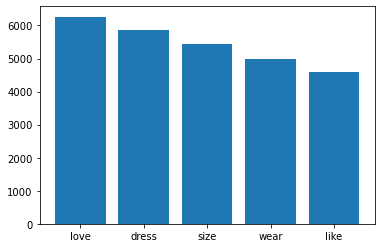

In [70]:
import matplotlib.pyplot as plt
liked_noun, number =zip(*most_liked_5_reviews)
plt.bar(liked_noun,number)
plt.xticks(roation = 60)
plt.title("Top 5 Customers like")

AttributeError: 'Text' object has no property 'roation'

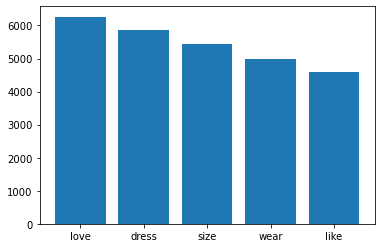

In [71]:
import matplotlib.pyplot as plt
Disliked_noun, number =zip(*most_disliked_5_reviews)
plt.bar(Disliked_noun,number)
plt.xticks(roation = 60)
plt.title("Top 5 Customers Hate")

#### Q4. Subset reviews by clothing department and identify the top five issues customers talk about in each clothing department. Present your results graphically.

In [ ]:
 df_group= df.groupby('ClothingDepartment')

In [ ]:
df_list=[]
for d in df['ClothingDepartment'].unique():
    temp= df[df['ClothingDepartment']] == d]
    temp = temp[temp['Rating']<3]
    df_list.append(temp)
    

In [ ]:
df_list = ['Intimate',
'Dresses',
'Bottoms',
'Tops',
'Jackets',
'trend']

In [ ]:
dept = df['ClothingDepartment'].unique()
i=0
for temp in df_list